In [1]:
import pandas as pd
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import classification_report,confusion_matrix
%matplotlib inline

In [2]:
# Manipulation with dates
from datetime import date
from dateutil.relativedelta import relativedelta

In [3]:
# Machine learning
import xgboost as xgb
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [4]:
incidents = pd.read_excel('incidents_braga.xlsx')
incidents.head()

,iconCategory,magnitudeOfDelay,startTime,endTime,length,delay,roadNumbers,events,coordinates,date,time,site,day
0,6,2,2021-05-07T06:58:30Z,2021-05-07T18:04:30Z,633.741,109,['N103'],Queuing traffic,"[[-8.4043640337, 41.5535974541], [-8.404236628...",2021-05-07,18:45:13,Braga,Friday
1,6,2,2021-05-07T06:15:00Z,2021-05-07T19:45:00Z,1754.017,172,[],Queuing traffic,"[[-8.4066948733, 41.5529014564], [-8.406719013...",2021-05-07,20:25:25,Braga,Friday
2,6,3,2021-05-07T19:05:00Z,2021-05-07T19:50:00Z,252.022,233,[],Stationary traffic,"[[-8.3983800254, 41.5530664241], [-8.397847606...",2021-05-07,20:30:26,Braga,Friday
3,8,4,2021-02-24T00:00:00Z,2021-05-08T22:59:59Z,136.902,0,[],"Closed, Roadworks","[[-8.4255964003, 41.553822761], [-8.4255400739...",2021-05-07,20:35:27,Braga,Friday
4,8,4,2021-02-24T00:00:00Z,2021-05-08T22:59:59Z,128.595,0,[],"Closed, Roadworks","[[-8.4255964003, 41.553822761], [-8.4255400739...",2021-05-08,06:16:55,Braga,Saturday


In [5]:
incidents = incidents.drop(columns=['startTime', 'endTime', 'coordinates'])
incidents.head()

,iconCategory,magnitudeOfDelay,length,delay,roadNumbers,events,date,time,site,day
0,6,2,633.741,109,['N103'],Queuing traffic,2021-05-07,18:45:13,Braga,Friday
1,6,2,1754.017,172,[],Queuing traffic,2021-05-07,20:25:25,Braga,Friday
2,6,3,252.022,233,[],Stationary traffic,2021-05-07,20:30:26,Braga,Friday
3,8,4,136.902,0,[],"Closed, Roadworks",2021-05-07,20:35:27,Braga,Friday
4,8,4,128.595,0,[],"Closed, Roadworks",2021-05-08,06:16:55,Braga,Saturday


In [6]:
ord_enc = OrdinalEncoder()
incidents["events_code"] = ord_enc.fit_transform(incidents[["events"]]).astype(int)
incidents["road_code"] = ord_enc.fit_transform(incidents[["roadNumbers"]]).astype(int)
incidents.head()

,iconCategory,magnitudeOfDelay,length,delay,roadNumbers,events,date,time,site,day,events_code,road_code
0,6,2,633.741,109,['N103'],Queuing traffic,2021-05-07,18:45:13,Braga,Friday,2,3
1,6,2,1754.017,172,[],Queuing traffic,2021-05-07,20:25:25,Braga,Friday,2,4
2,6,3,252.022,233,[],Stationary traffic,2021-05-07,20:30:26,Braga,Friday,4,4
3,8,4,136.902,0,[],"Closed, Roadworks",2021-05-07,20:35:27,Braga,Friday,1,4
4,8,4,128.595,0,[],"Closed, Roadworks",2021-05-08,06:16:55,Braga,Saturday,1,4


In [7]:
# Transformar variaveis em tipo categorico
lista = ['roadNumbers','events','site', 'day']
for i in lista:
    incidents[i] = pd.Categorical(incidents[i])

In [8]:
# Transformar varivaveis em tipo numerico
incidents['length'] = incidents['length'].astype(np.int64)

In [9]:
#Combinar date e time em uma única variável chamada "period", tranformar para o formato datetime.
incidents['period'] = incidents['date'].astype(str) + ' ' + incidents['time'].astype(str)
incidents = incidents.drop(columns=['date', 'time']) 
print(incidents['period'])

0      2021-05-07 18:45:13
1      2021-05-07 20:25:25
2      2021-05-07 20:30:26
3      2021-05-07 20:35:27
4      2021-05-08 06:16:55
              ...         
794    2021-05-14 15:09:04
795    2021-05-14 15:14:05
796    2021-05-14 15:37:39
797    2021-05-14 15:47:45
798    2021-05-14 15:52:47
Name: period, Length: 799, dtype: object


In [10]:
incidents['period'] = pd.to_datetime(incidents['period'], 
 format = '%Y-%m-%d %H:%M:%S', 
 errors = 'coerce')

In [11]:
incidents['day_code'] = incidents['period'].dt.dayofweek
incidents['Hour'] = incidents['period'].dt.hour
incidents['Minute'] = incidents['period'].dt.minute

In [12]:
incidents.head()

,iconCategory,magnitudeOfDelay,length,delay,roadNumbers,events,site,day,events_code,road_code,period,day_code,Hour,Minute
0,6,2,633,109,['N103'],Queuing traffic,Braga,Friday,2,3,2021-05-07 18:45:13,4,18,45
1,6,2,1754,172,[],Queuing traffic,Braga,Friday,2,4,2021-05-07 20:25:25,4,20,25
2,6,3,252,233,[],Stationary traffic,Braga,Friday,4,4,2021-05-07 20:30:26,4,20,30
3,8,4,136,0,[],"Closed, Roadworks",Braga,Friday,1,4,2021-05-07 20:35:27,4,20,35
4,8,4,128,0,[],"Closed, Roadworks",Braga,Saturday,1,4,2021-05-08 06:16:55,5,6,16


In [13]:
incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   iconCategory      799 non-null    int64         
 1   magnitudeOfDelay  799 non-null    int64         
 2   length            799 non-null    int64         
 3   delay             799 non-null    int64         
 4   roadNumbers       799 non-null    category      
 5   events            799 non-null    category      
 6   site              799 non-null    category      
 7   day               799 non-null    category      
 8   events_code       799 non-null    int32         
 9   road_code         799 non-null    int32         
 10  period            799 non-null    datetime64[ns]
 11  day_code          799 non-null    int64         
 12  Hour              799 non-null    int64         
 13  Minute            799 non-null    int64         
dtypes: category(4), datetime64

In [14]:
incidents.describe()

,iconCategory,magnitudeOfDelay,length,delay,events_code,road_code,day_code,Hour,Minute
count,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000
mean,6.022528,2.603254,608.966208,156.873592,3.496871,3.609512,1.849812,13.659574,29.827284
std,0.211198,0.705538,4555.063616,127.647100,0.837515,0.778926,1.950508,4.171061,17.381542
min,6.000000,1.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,2.000000,194.000000,73.500000,3.000000,4.000000,0.000000,10.000000,15.000000
50%,6.000000,3.000000,300.000000,135.000000,4.000000,4.000000,1.000000,14.000000,30.000000
75%,6.000000,3.000000,504.000000,197.500000,4.000000,4.000000,3.000000,17.000000,45.000000
max,8.000000,4.000000,128595.000000,1312.000000,4.000000,4.000000,6.000000,23.000000,59.000000


In [15]:
# Resumo da distribuição de classe 
from collections import Counter
classes = incidents.values[:,1]
counter = Counter(classes)
for k,v in counter.items():
	per = v / len(classes) * 100
	print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=2, Count=138, Percentage=17.272%
Class=3, Count=558, Percentage=69.837%
Class=4, Count=9, Percentage=1.126%
Class=1, Count=94, Percentage=11.765%


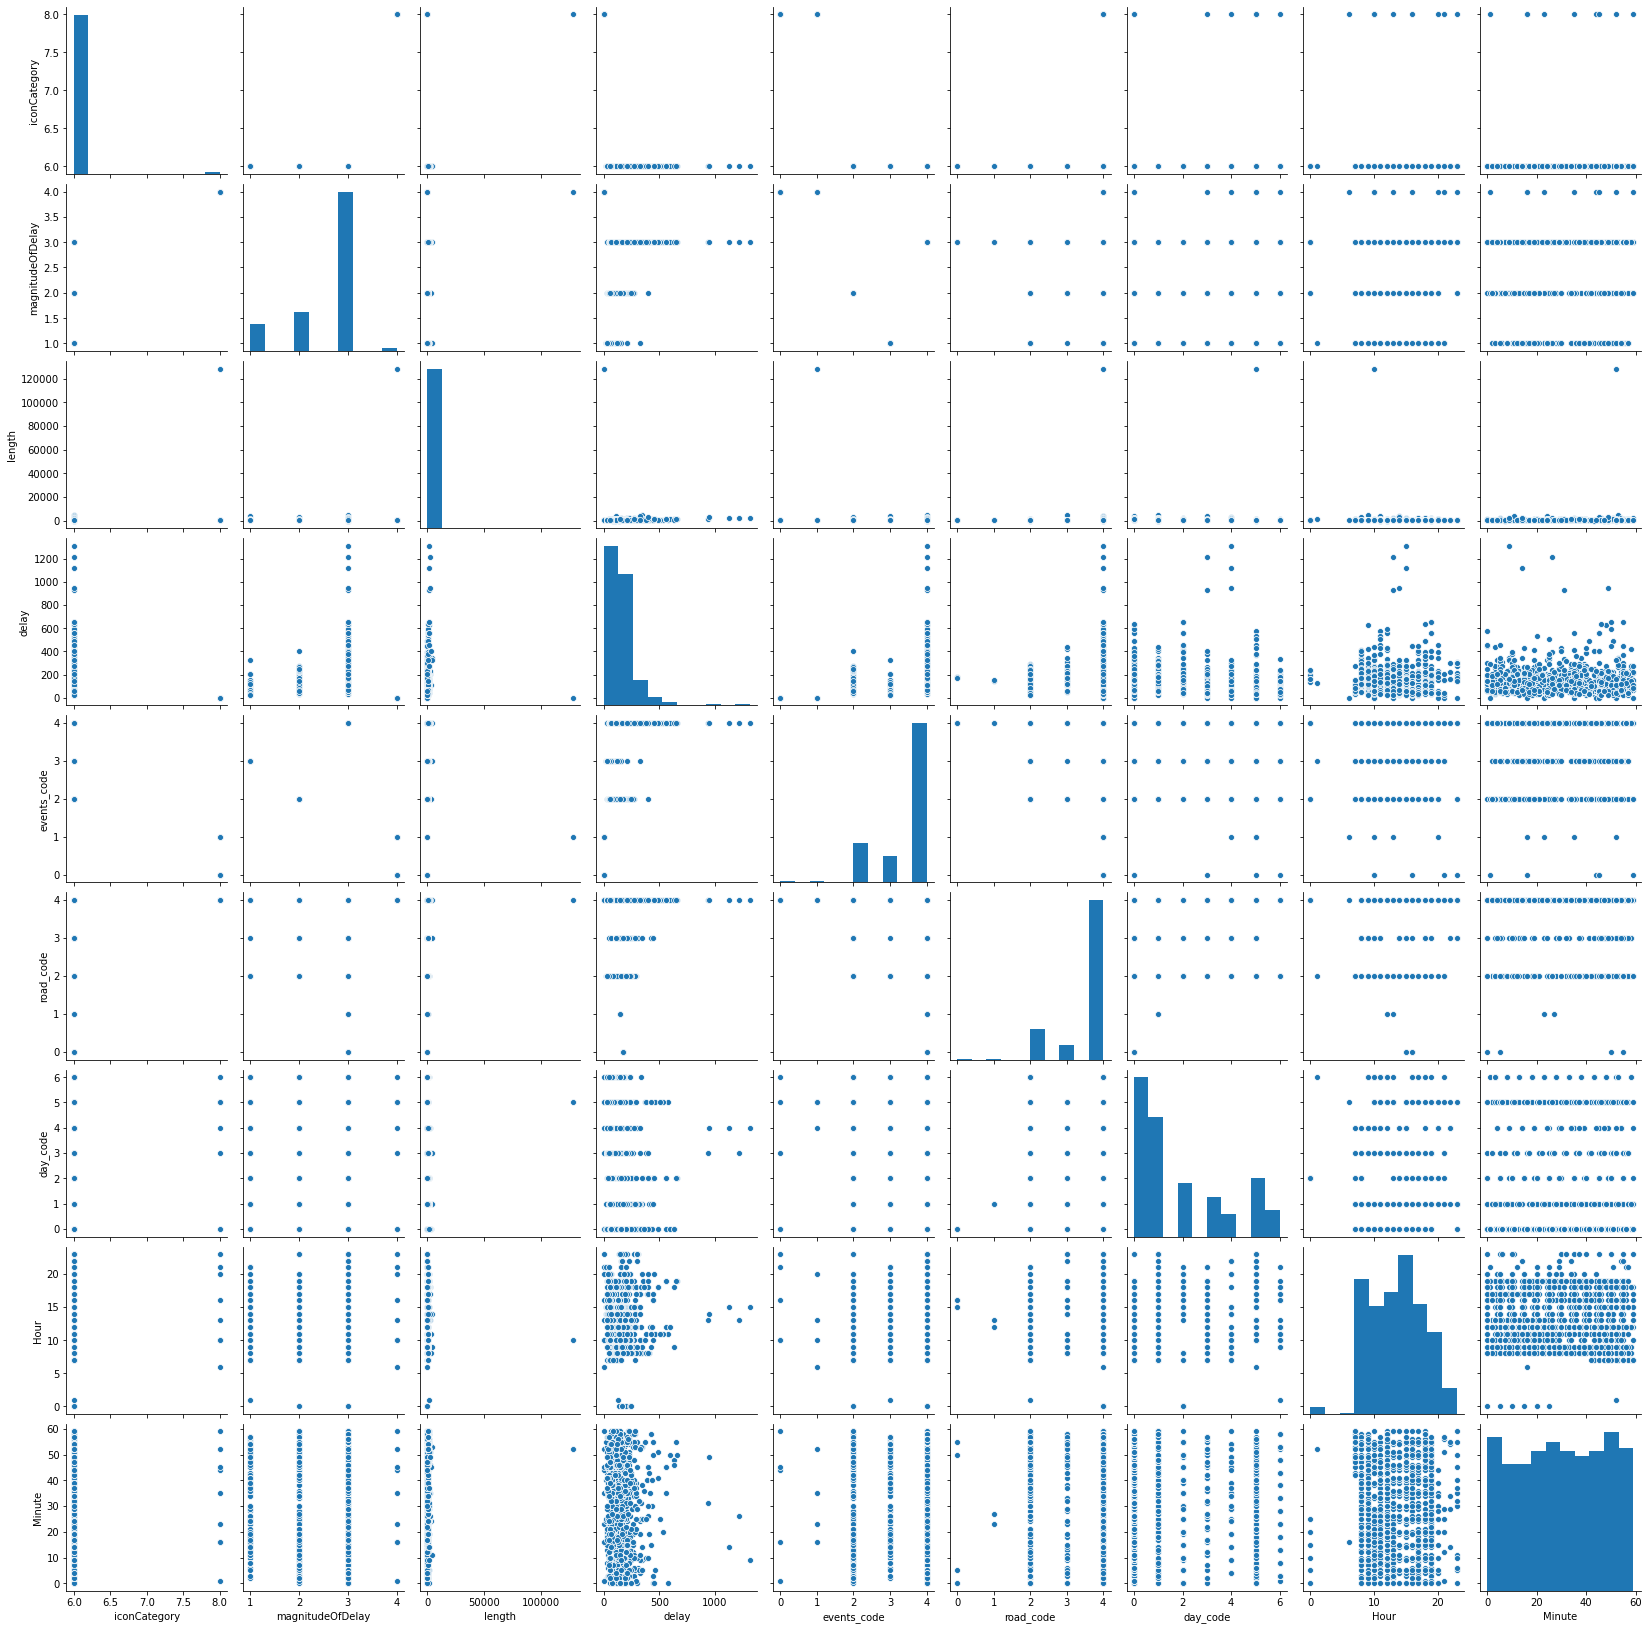

In [16]:
sns.pairplot(incidents)

C:\Users\netoa\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\netoa\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


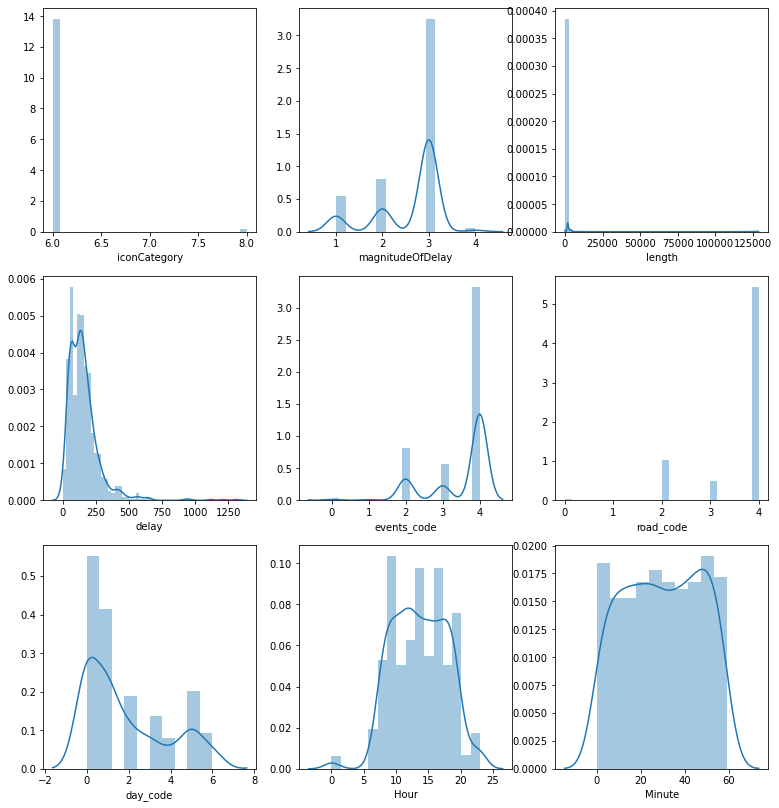

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13,14))
df = incidents.drop(columns=['roadNumbers', 'events', 'period', 'site', 'day'])
for i, column in enumerate(df.columns):    
    sns.distplot(df[column], ax=axes[i//3,i%3])

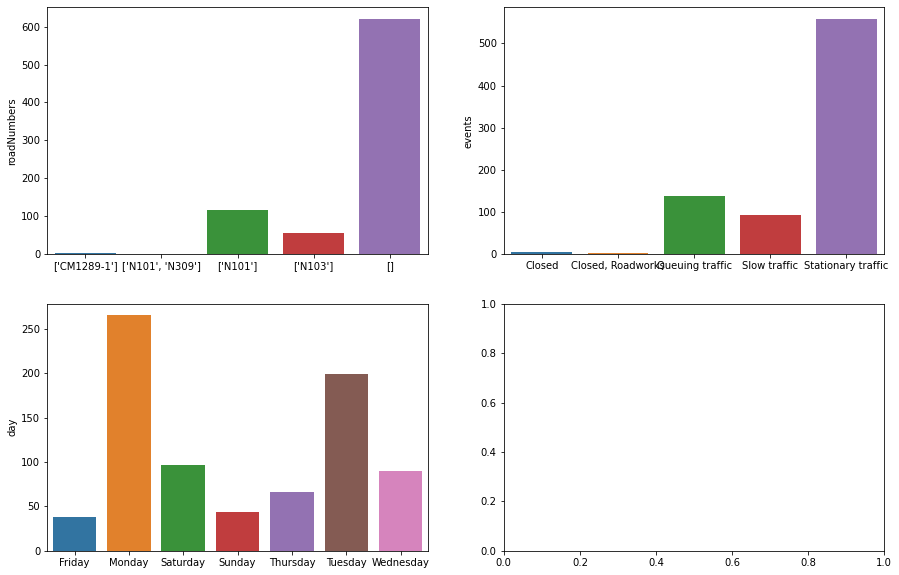

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
df = pd.DataFrame(incidents, columns=['roadNumbers', 'events', 'day'])
for i, column in enumerate(df.columns):    
    sns.barplot(df[column].value_counts().index, df[column].value_counts(), ax=axes[i//2,i%2])

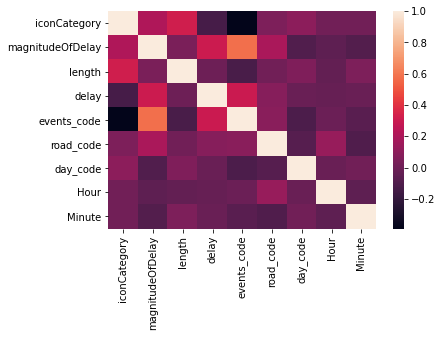

In [19]:
sns.heatmap(incidents.corr())

# Logistic Regression

In [20]:
#Criar o dataset com as colunas com as variáveis preditoras
preditors = incidents[['length', 'delay','day_code', 'road_code', 'Hour', 'Minute']]

#Criar a dataset com a variável target (alvo)
target = incidents['magnitudeOfDelay']

#Criar subconjunto de dados de treino e de test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(preditors, 
                                                    target, 
                                                    test_size=0.3,
                                                    random_state=123)

In [21]:
#vertor para armazenar os valores das perfomances de cada modelo e ao final do programa gerar uma tabela comparativa
performance = []

In [22]:
logmodel = LogisticRegression(solver='lbfgs', max_iter=10000)

In [23]:
logmodel.fit(X_train,y_train)
logpredict = logmodel.predict(X_test)

In [24]:
print(classification_report(y_test, logpredict))

              precision    recall  f1-score   support

           1       0.68      0.79      0.73        24
           2       1.00      0.20      0.33        51
           3       0.81      0.99      0.89       161
           4       1.00      1.00      1.00         4

    accuracy                           0.80       240
   macro avg       0.87      0.75      0.74       240
weighted avg       0.84      0.80      0.76       240



In [25]:
train_score = logmodel.score(X_train, y_train)
test_score = logmodel.score(X_test, y_test)

print(f'LogisticRegression : Training s core - {train_score} | Accuracy - {test_score}')

performance.append({'Algoritmo':'LogisticRegression', 'training_score':train_score, 'accuracy_score':test_score})

LogisticRegression : Training s core - 0.8497316636851521 | Accuracy - 0.8041666666666667


In [26]:
y_train_preds = logmodel.predict_proba(X_train)[:,1]
y_test_preds = logmodel.predict_proba(X_test)[:,1]

# Naive Bayes

In [27]:
#Metodo Naive Bayes
NBmodel = GaussianNB()

In [28]:
#Executar o modelo e aplicar o predict sobre o modelo para uma posterior análise de desempenho do mesmo
NBmodel.fit(X_train, y_train)
NBpredict = NBmodel.predict(X_test)

In [29]:
#Confusion Matrix para Modelo Naive Bayes
print(classification_report(y_test, NBpredict))

              precision    recall  f1-score   support

           1       0.47      0.33      0.39        24
           2       0.70      0.14      0.23        51
           3       0.74      0.97      0.84       161
           4       1.00      0.50      0.67         4

    accuracy                           0.72       240
   macro avg       0.73      0.48      0.53       240
weighted avg       0.71      0.72      0.66       240



In [30]:
# Armazenar nas variáveis os Scores dos dataset de treino e teste
train_score = NBmodel.score(X_train, y_train)
test_score = NBmodel.score(X_test, y_test) #Accuracy

In [31]:
#Exibe no console os scores de treino e teste. 
print(f'Gaussian Naive Bayes : Training score - {train_score} | Accuracy score - {test_score}')

#Armazena os valores obtidos acima no vetor performance.
performance.append({'Algoritmo':'Gaussian Naive Bayes', 'training_score':train_score, 'accuracy_score':test_score})

Gaussian Naive Bayes : Training score - 0.7728085867620751 | Accuracy score - 0.7208333333333333


# Decision Tree

In [32]:
dtc = DecisionTreeClassifier()

In [33]:
dtc = dtc.fit(X_train, y_train)
dtcpredict = dtc.predict(X_test)

In [34]:
print(classification_report(y_test, dtcpredict))

              precision    recall  f1-score   support

           1       0.81      0.88      0.84        24
           2       0.72      0.61      0.66        51
           3       0.89      0.91      0.90       161
           4       0.80      1.00      0.89         4

    accuracy                           0.85       240
   macro avg       0.80      0.85      0.82       240
weighted avg       0.84      0.85      0.84       240



In [35]:
train_score = dtc.score(X_train,y_train)
test_score = dtc.score(X_test,y_test)

print(f'Decision Tree : Training score - {train_score} | Accuracy - {test_score}')

performance.append({'Algoritmo':'Decision Tree', 'training_score':train_score, 'accuracy_score':test_score})

Decision Tree : Training score - 1.0 | Accuracy - 0.8458333333333333


# Random Forest

In [36]:
rndTree = RandomForestClassifier()

In [37]:
rndTree.fit(X_train,y_train)
rndTpredict = rndTree.predict(X_test)

In [38]:
print(classification_report(y_test, rndTpredict))

              precision    recall  f1-score   support

           1       0.83      0.79      0.81        24
           2       0.88      0.55      0.67        51
           3       0.87      0.98      0.92       161
           4       1.00      1.00      1.00         4

    accuracy                           0.87       240
   macro avg       0.89      0.83      0.85       240
weighted avg       0.87      0.87      0.86       240



In [39]:
train_score = rndTree.score(X_train,y_train)
test_score = rndTree.score(X_test,y_test)

print(f'Random Forests : Training score - {train_score} | Accuracy - {test_score}')

performance.append({'Algoritmo':'Random Forests', 'training_score':train_score, 'accuracy_score':test_score})

Random Forests : Training score - 1.0 | Accuracy - 0.8708333333333333


# XGBoost

In [40]:
xgb_model = xgb.XGBClassifier()

In [41]:
xgb_model.fit(X_train, y_train)
xgbpredict = xgb_model.predict(X_test)

[22:07:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\netoa\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [42]:
print(classification_report(y_test, xgbpredict))

              precision    recall  f1-score   support

           1       0.83      0.83      0.83        24
           2       0.89      0.61      0.72        51
           3       0.89      0.98      0.93       161
           4       1.00      1.00      1.00         4

    accuracy                           0.89       240
   macro avg       0.90      0.86      0.87       240
weighted avg       0.89      0.89      0.88       240



In [43]:
train_score = xgb_model.score(X_train,y_train)
test_score = xgb_model.score(X_test,y_test)

print(f'XGBoost : Training score - {train_score} | Accuracy - {test_score}')

performance.append({'Algoritmo':'XGBoost', 'training_score':train_score, 'accuracy_score':test_score})

XGBoost : Training score - 1.0 | Accuracy - 0.8875


# Performance Result

In [44]:
performance_df = pd.DataFrame(performance)

In [45]:
# Exibir tabela de performance dos modelos
performance_df

,Algoritmo,training_score,accuracy_score
0,LogisticRegression,0.849732,0.804167
1,Gaussian Naive Bayes,0.772809,0.720833
2,Decision Tree,1.000000,0.845833
3,Random Forests,1.000000,0.870833
4,XGBoost,1.000000,0.887500


# Prediction

day_code:
- 0: "Monday"
- 1: "Tuesday"
- 2: "Wednesday"
- 3: "Thursday"
- 4: "Friday"
- 5: "Saturday"
- 6: "Sunday"

road_code: 0 - 5


In [46]:
dados = {'length':200, 'delay':50, 'day_code':6, 'road_code':5, 'Hour':12, 'Minute':45}
df = pd.DataFrame(dados, index=[0])
df

,length,delay,day_code,road_code,Hour,Minute
0,200,50,6,5,12,45


In [47]:
result = xgb_model.predict(df)
print(result)

[2]


Legenda:
- 0: "Unknown",
- 1: "Minor",
- 2: "Moderate",
- 3: "Major",
- 4: "Undefined (used for road closures and other indefinite delays)",
